In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as scp_stat
import pandas as pd
import numpy as np

In [25]:
#Plotting parameters
columnwidth = 245.26653   #in points
textwidth = 513.11743     #in points
pts2inches = 1./72.27    #Conversion from pts to inches
fw_column = columnwidth * pts2inches  #Figure width for a figure that spans the width of a column
fw_text   = textwidth * pts2inches    #Figure width for a figure that spans the width of the page
sns.set()
sns.set_context('paper')
sns_colors = sns.color_palette()
sns.set_style('ticks')
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = 'Computer Modern Roman'

In [26]:
#Upload all of the data. In particular this script uploads the SPIRE fluxes and BAT fluxes and converts them to luminosities.
#It also separates the sample into Sy 1's and Sy 2's.
#The relevant variables that it creates are l250, l350, l500, lbat, sy1_sample, and sy2_sample.
#sy1_sample is a boolean array that will filter out all of the Sy 1's. Likewise for sy2_sample and Sy 2's.

dir = '/Users/ttshimiz/Github/bat-data/'
bat_herschel = pd.read_csv(dir+'bat_herschel.csv', index_col=0)
bat_info = pd.read_csv(dir+'bat_info.csv', index_col=0)

dist_mpc = bat_info['Dist_[Mpc]'].values
h250 = bat_herschel['PSW'].values
h250_err = bat_herschel['PSW_err'].values
h350 = bat_herschel['PMW'].values
h350_err = bat_herschel['PMW_err'].values
h500 = bat_herschel['PLW'].values
h500_err = bat_herschel['PLW_err'].values

sy1_sample = np.zeros(313, dtype = 'bool')
sy2_sample = np.zeros(313, dtype = 'bool')
liner_sample = np.zeros(313, dtype = 'bool')
agn_sample = np.zeros(313, dtype = 'bool')


#Separate the Sy 1 and Sy 2 samples. Sy 1 = Sy 1, 1.2, and 1.5. Sy 2 = Sy 1.8, 1.9, and 2
#Also create a LINER sample and AGN sample

for i in range(313):

    type_split = bat_info.ix[i, 'BAT_Type'].split()

    if (type_split[0] == 'Sy'):
        if ((type_split[1] == '1') | (type_split[1] == '1.2') | (type_split[1] == '1.4') | (type_split[1] == '1.5')):

            sy1_sample[i] = 1

        elif ((type_split[1] == '1.8') | (type_split[1] == '1.9') | (type_split[1] == '2')):
            sy2_sample[i] = 1
    else:

        if (type_split[0] == 'LINER'):
            liner_sample[i] = 1

        elif (type_split[0] == 'AGN'):
            agn_sample[i] = 1
            
l250 = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/250.0e-4)*h250*10**(-23)
l250_err = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/250.0e-4)*h250_err*10**(-23)
l350 = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/350.0e-4)*h350*10**(-23)
l350_err = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/350.0e-4)*h350_err*10**(-23)
l500 = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/500.0e-4)*h500*10**(-23)
l500_err = 4*np.pi*(dist_mpc*10**6*3.09e18)**2*(3.0e10/500.0e-4)*h500_err*10**(-23)

In [27]:
#Pull out all of the undetected galaxies and separate into Sy 1 and Sy 2
undetected250 = l250 == 0                 #Undetected points have a flux of zero
undetected350 = l350 == 0
undetected500 = l500 == 0

l250_sy1_undetected = l250_err[undetected250 & sy1_sample] #The 5sigma upper limit is then the error
l250_sy2_undetected = l250_err[undetected250 & sy2_sample]
l350_sy1_undetected = l350_err[undetected350 & sy1_sample] 
l350_sy2_undetected = l350_err[undetected350 & sy2_sample]
l500_sy1_undetected = l500_err[undetected500 & sy1_sample] 
l500_sy2_undetected = l500_err[undetected500 & sy2_sample]

l250_sy1_detected = l250[~undetected250 & sy1_sample]
l250_sy2_detected = l250[~undetected250 & sy2_sample]
l350_sy1_detected = l350[~undetected350 & sy1_sample]
l350_sy2_detected = l350[~undetected350 & sy2_sample]
l500_sy1_detected = l500[~undetected500 & sy1_sample]
l500_sy2_detected = l500[~undetected500 & sy2_sample]

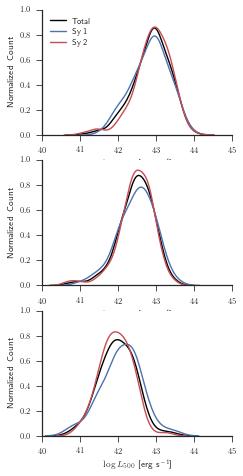

In [28]:
#Plot the histogram of the L250, L350, and L500 distributions as well as the KDE for the total sample, Sy 1s, and Sy 2s.
#sns.set()
fig = plt.figure(figsize=(fw_column, fw_column*9./4.))

#L250
ax1 = fig.add_subplot(311)
sns.kdeplot(np.log10(l250[~undetected250]), color='black', label='Total')
sns.kdeplot(np.log10(l250_sy1_detected), color=sns_colors[0], label='Sy 1')
sns.kdeplot(np.log10(l250_sy2_detected), color=sns_colors[2], label='Sy 2')
ax1.set_xlim(40.0, 45.0)
ax1.set_ylim(0, 1)
ax1.legend(loc='upper left')
ax1.set_xlabel(r'$\log L_{250}$ [erg s$^{-1}$]')
ax1.set_ylabel('Normalized Count')
#L350
ax2 = fig.add_subplot(312)
sns.kdeplot(np.log10(l350[~undetected350]), color='black')
sns.kdeplot(np.log10(l350_sy1_detected), color=sns_colors[0])
sns.kdeplot(np.log10(l350_sy2_detected), color=sns_colors[2])
ax2.set_xlim(40.0, 45.0)
ax2.set_ylim(0, 1)
ax2.set_xlabel(r'$\log L_{350}$ [erg s$^{-1}$]')
ax2.set_ylabel('Normalized Count')

#L500
ax3 = fig.add_subplot(313)
sns.kdeplot(np.log10(l500[~undetected500]), color='black')
sns.kdeplot(np.log10(l500_sy1_detected), color=sns_colors[0])
sns.kdeplot(np.log10(l500_sy2_detected), color=sns_colors[2])
ax3.set_xlim(40.0, 45.0)
ax3.set_ylim(0, 1)
ax3.set_xlabel(r'$\log L_{500}$ [erg s$^{-1}$]')
ax3.set_ylabel('Normalized Count')

sns.despine()

In [30]:
fig.savefig('/Users/ttshimiz/Dropbox/Research/Thesis/SPIRE_Photometry/Paper/Figures/spire_sy_lum_distributions.eps',
            bbox_inches='tight')

In [29]:
#Run a K-S test between the Sy 1 and Sy 2 luminosity distribution
ks_l250 = scp_stat.ks_2samp(np.log10(l250_sy1_detected), np.log10(l250_sy2_detected))
ks_l350 = scp_stat.ks_2samp(np.log10(l350_sy1_detected), np.log10(l350_sy2_detected))
ks_l500 = scp_stat.ks_2samp(np.log10(l500_sy1_detected), np.log10(l500_sy2_detected))

#Print the results
print 'L250: D = ',ks_l250[0], ', P_KS = ', ks_l250[1]
print 'L350: D = ',ks_l350[0], ', P_KS = ', ks_l350[1]
print 'L500: D = ',ks_l500[0], ', P_KS = ', ks_l500[1]

L250: D =  0.13544600939 , P_KS =  0.169731043896
L350: D =  0.107696215392 , P_KS =  0.538229845546
L500: D =  0.226827094474 , P_KS =  0.0611580532915
